Install Dependencies

In [1]:
!pip install -q hvplot
!pip install -q xlrd
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 40.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.6 MB 17.6 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 111.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=23a9dc729aa55c8a2e4ecf74f336dfe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import pickle

Import Dataset: *Absenteeism at work*

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_excel('/content/drive/MyDrive/bigData/Absenteeism_at_work.xls')
data.columns = data.columns.str.replace(" ", "_")
data.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


EDA: Exploratory data analysis (EDA) is an essential step in any machine learning project, including big data machine learning systems. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason_for_absence               740 non-null    int64
 2   Month_of_absence                 740 non-null    int64
 3   Day_of_the_week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation_expense           740 non-null    int64
 6   Distance_from_Residence_to_Work  740 non-null    int64
 7   Service_time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work_load_Average/day_           740 non-null    int64
 10  Hit_target                       740 non-null    int64
 11  Disciplinary_failure             740 non-null    int64
 12  Education                        740 non-null    i

In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

In [112]:
for column in data.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {data[column].nunique()}")
    print(f"Max: {data[column].max()}")
    print(f"Min: {data[column].min()}")

===============Column: ID==============
Number of unique values: 36
Max: 36
Min: 1
===============Column: Reason_for_absence==============
Number of unique values: 28
Max: 28
Min: 0
===============Column: Month_of_absence==============
Number of unique values: 13
Max: 12
Min: 0
===============Column: Day_of_the_week==============
Number of unique values: 5
Max: 6
Min: 2
===============Column: Seasons==============
Number of unique values: 4
Max: 4
Min: 1
===============Column: Transportation_expense==============
Number of unique values: 24
Max: 388
Min: 118
===============Column: Distance_from_Residence_to_Work==============
Number of unique values: 25
Max: 52
Min: 5
===============Column: Service_time==============
Number of unique values: 18
Max: 29
Min: 1
===============Column: Age==============
Number of unique values: 22
Max: 58
Min: 27
===============Column: Work_load_Average/day_==============
Number of unique values: 38
Max: 378884
Min: 205917
===============Column: Hit_target

In [113]:
data.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [ ]:
#We can make a simple EDA with "pandasprofiling".
from ydata_profiling import ProfileReport
df=data.copy()
df_profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
df_profile

Dropping column id as part of pre processing

In [115]:
data.drop('ID', axis=1, inplace=True)

In [119]:
from functools import reduce

# result = reduce((lambda x, y: x * y), cat_col)

Visualizing of how the data is distributed with respect to all features given in the dataset

Reason for Absence

In [ ]:

data.hvplot.hist(y='Reason_for_absence', height=350, width=350)

:Histogram   [Reason_for_absence]   (Reason_for_absence_count)

Month of Absence

In [ ]:
data['Month_of_absence'].value_counts().hvplot.bar(height=350, width=350)

:Bars   [index]   (Month_of_absence)

Day of the Week

In [ ]:
data['Day_of_the_week'].value_counts().hvplot.bar(height=350, width=350)

:Bars   [index]   (Day_of_the_week)

Seasons

In [ ]:
data['Seasons'].value_counts().hvplot.bar(height=350, width=350)

:Bars   [index]   (Seasons)

In [ ]:
data.columns

Index(['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

Absenteeism time in Hours

In [ ]:
print(f"{data['Absenteeism_time_in_hours'].value_counts()}")
print(f"{data['Absenteeism_time_in_hours'].value_counts()[0] / data['Absenteeism_time_in_hours'].value_counts()[1]}")

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
5        7
40       7
32       6
64       3
80       3
120      3
56       2
112      2
7        1
104      1
48       1
Name: Absenteeism_time_in_hours, dtype: int64
0.5


Educationwise count of employees

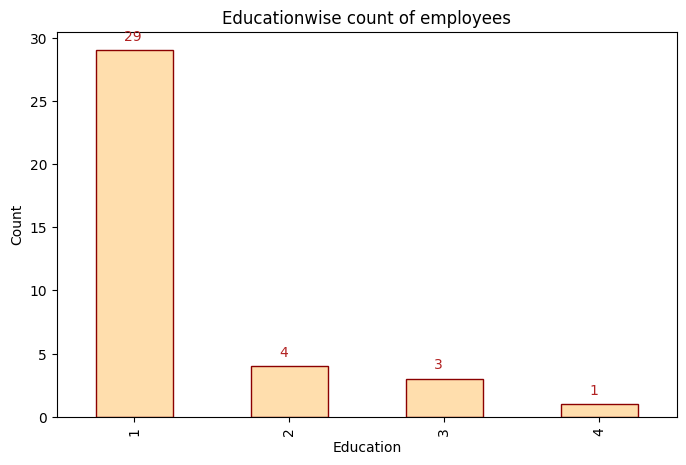

In [126]:
edu_count = df.groupby(['Education']).agg({'ID': pd.Series.nunique})
ax = edu_count.plot(kind='bar', figsize=(8,5), legend=False, color="navajowhite",edgecolor='darkred')
for i, v in enumerate(edu_count.values):
    ax.text(i-.065, v + 0.8, str(v[0]), color='firebrick')
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Educationwise count of employees')
plt.show()

In [ ]:
data["Reason_for_absence"] = data["Reason_for_absence"].map(
    {
        0: "Group_1", 1: "Group_1", 2: "Group_1", 3: "Group_1", 
        4: "Group_1", 5: "Group_1", 6: "Group_1", 7: "Group_1", 
        8: "Group_1", 9: "Group_1", 10: "Group_1", 11: "Group_1", 
        12: "Group_1", 13: "Group_1", 14: "Group_1", 15: "Group_2", 
        16: "Group_2", 17: "Group_2", 17: "Group_2", 18: "Group_3", 
        19: "Group_3", 20: "Group_3", 21: "Group_3", 22: "Group_4", 
        23: "Group_4", 24: "Group_4", 25: "Group_4", 26: "Group_4", 
        27: "Group_4", 28: "Group_4"
    }
)
# data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["Reason_for_absence"].value_counts()

Group_4    435
Group_1    232
Group_3     67
Group_2      6
Name: Reason_for_absence, dtype: int64

In [ ]:
data_1 = pd.get_dummies(data, columns=['Reason_for_absence'])

In [ ]:
data_1.head()

,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,...,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,Reason_for_absence_Group_1,Reason_for_absence_Group_2,Reason_for_absence_Group_3,Reason_for_absence_Group_4
0,7,3,1,289,36,13,33,239554,97,0,...,0,1,90,172,30,4,0,0,0,1
1,7,3,1,118,13,18,50,239554,97,1,...,0,0,98,178,31,0,1,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,...,0,0,89,170,31,2,0,0,0,1
3,7,5,1,279,5,14,39,239554,97,0,...,1,0,68,168,24,4,1,0,0,0
4,7,5,1,289,36,13,33,239554,97,0,...,0,1,90,172,30,2,0,0,0,1


In [ ]:
data_1.dtypes

Month_of_absence                   int64
Day_of_the_week                    int64
Seasons                            int64
Transportation_expense             int64
Distance_from_Residence_to_Work    int64
Service_time                       int64
Age                                int64
Work_load_Average/day_             int64
Hit_target                         int64
Disciplinary_failure               int64
Education                          int64
Son                                int64
Social_drinker                     int64
Social_smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body_mass_index                    int64
Absenteeism_time_in_hours          int64
Reason_for_absence_Group_1         uint8
Reason_for_absence_Group_2         uint8
Reason_for_absence_Group_3         uint8
Reason_for_absence_Group_4         uint8
dtype: object

In [ ]:
data_1.dropna(inplace=True)
data_1.isna().sum()

Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
Reason_for_absence_Group_1         0
Reason_for_absence_Group_2         0
Reason_for_absence_Group_3         0
Reason_for_absence_Group_4         0
dtype: int64

Age wise Employee Count :

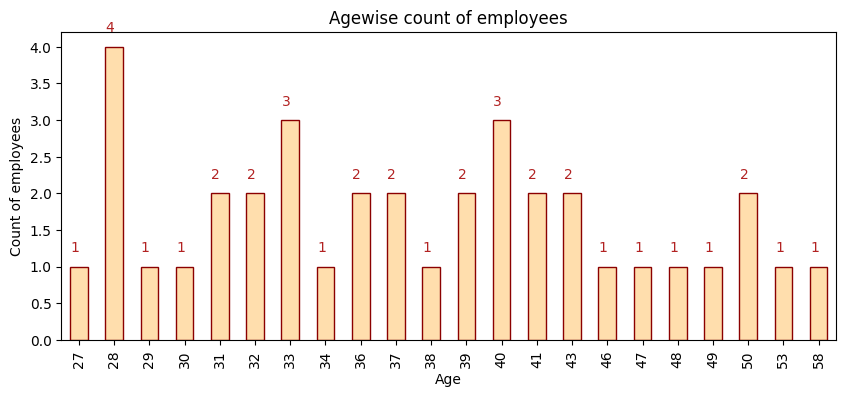

In [124]:
age_count = df.groupby(['Age']).agg({'ID': pd.Series.nunique})
ax = age_count.plot(kind='bar', figsize=(10,4), legend=False, color="navajowhite",edgecolor='darkred')
for i, v in enumerate(age_count.values):
    ax.text(i-.24, v +0.2, str(v[0]), color='firebrick')
ax.set_xlabel('Age')
ax.set_ylabel('Count of employees')
ax.set_title('Agewise count of employees')
plt.show()

In [ ]:
data_2 = pd.get_dummies(data_1, columns=["Education"], drop_first=True)
data_2.columns

Index(['Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Son', 'Social_drinker', 'Social_smoker', 'Pet',
       'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours',
       'Reason_for_absence_Group_1', 'Reason_for_absence_Group_2',
       'Reason_for_absence_Group_3', 'Reason_for_absence_Group_4',
       'Education_1'],
      dtype='object')

<Axes: >

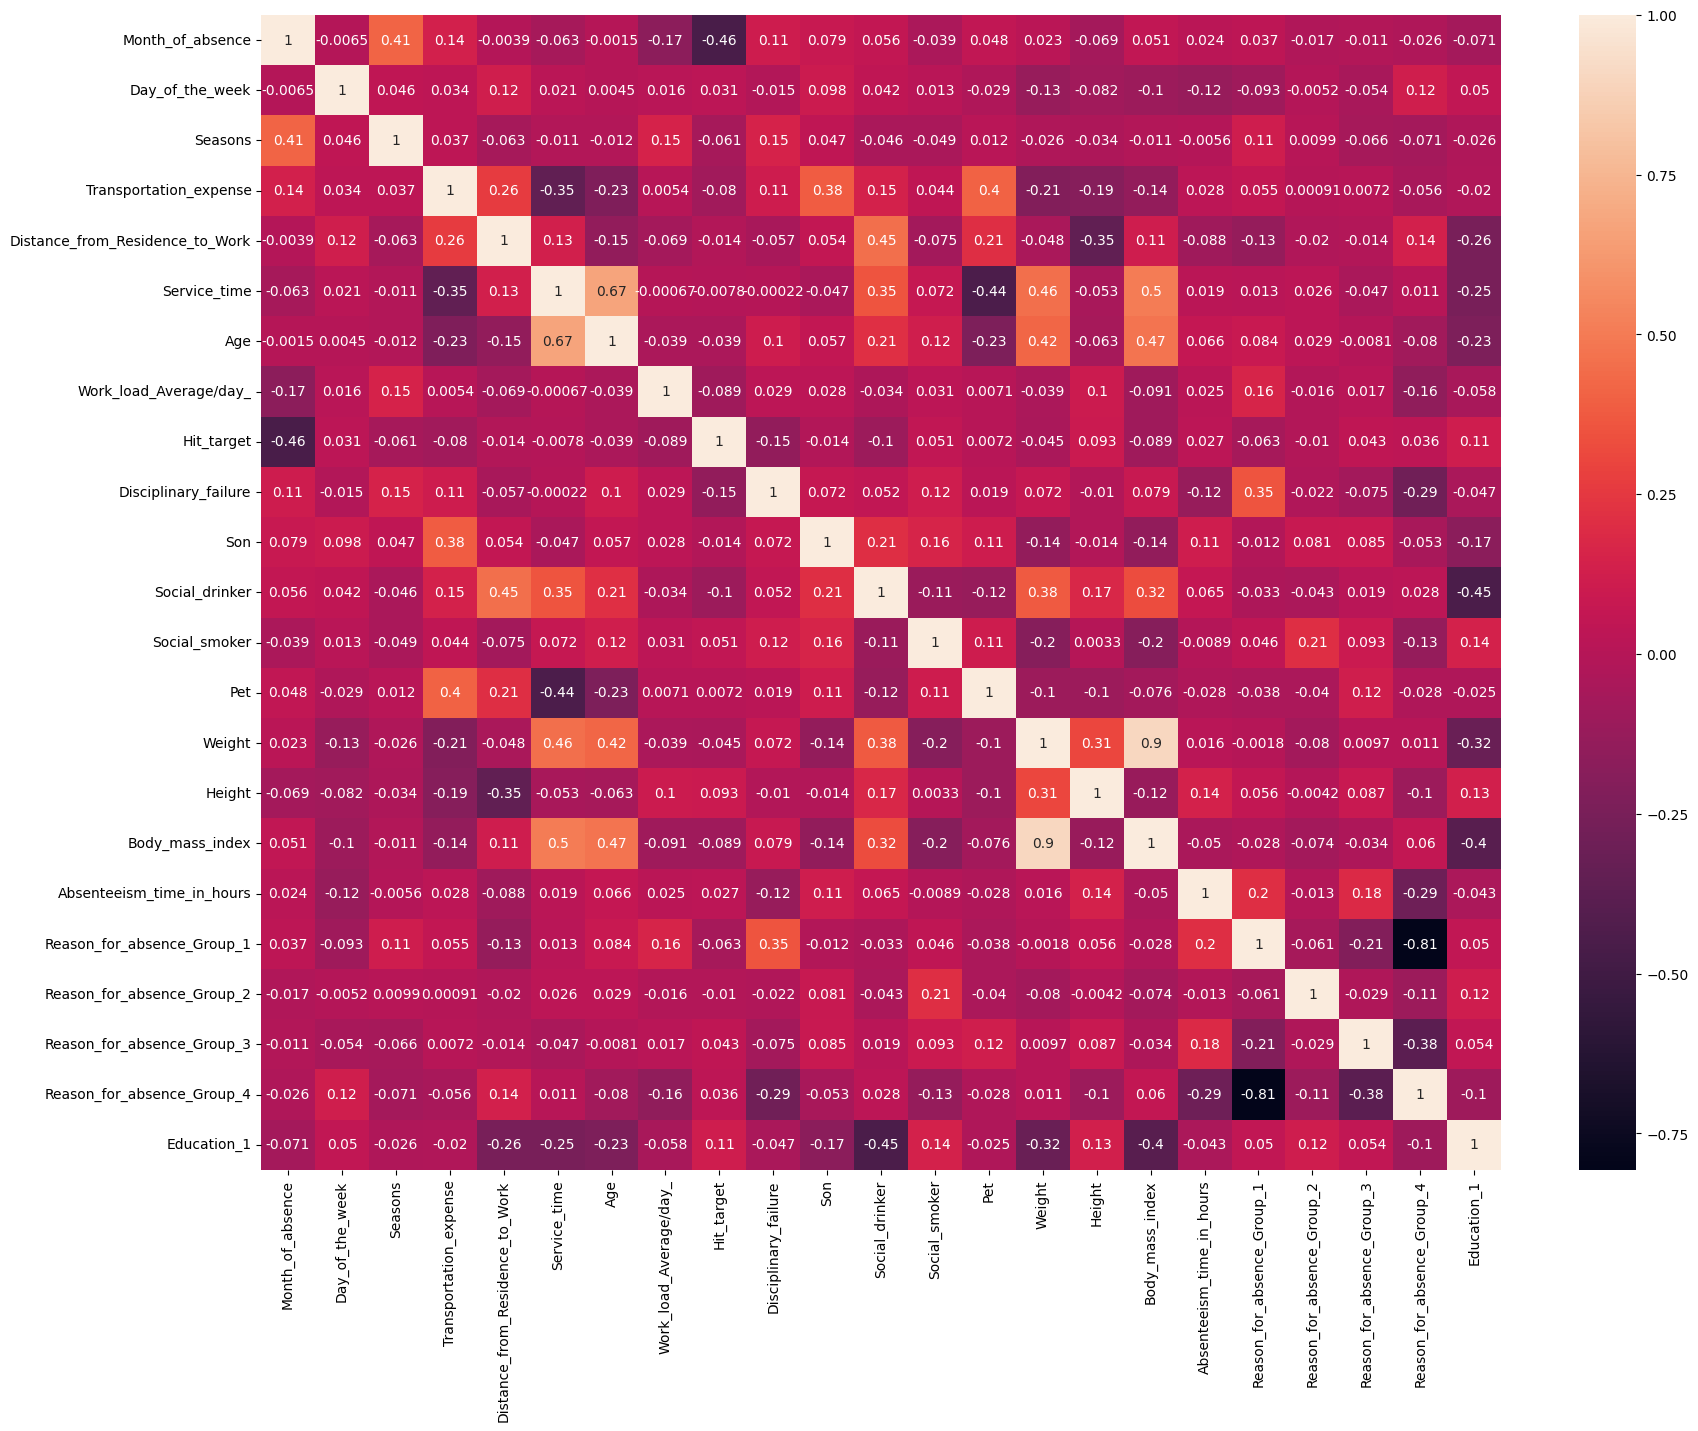

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_2.corr(), annot=True)

The below visualization shows average transportation expense by distance.

<ipython-input-123-cdeee1ba73c4>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.text(i-.45, v + 8, str(np.int(np.round(v))), color='firebrick')


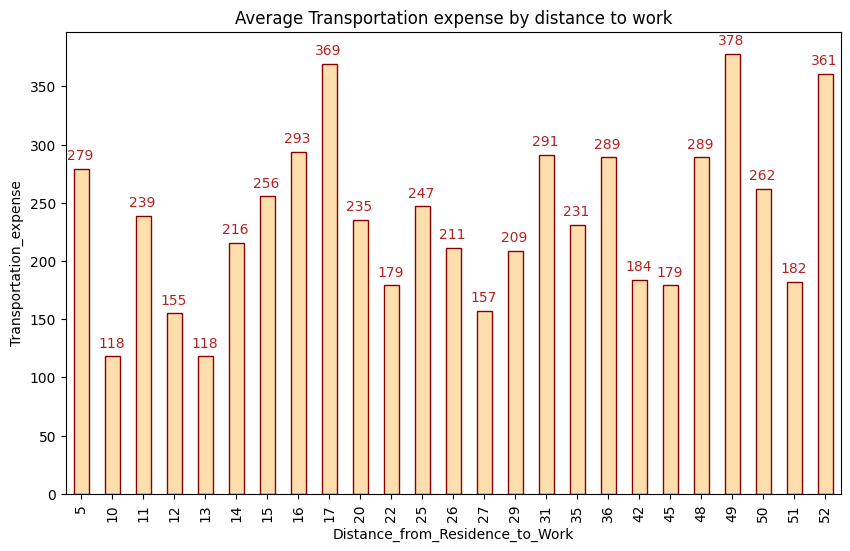

In [123]:
dis_exp = df.groupby('Distance_from_Residence_to_Work')[['Transportation_expense']].mean()
ax = dis_exp.plot(kind='bar', figsize=(10,6), legend=False, color="navajowhite",edgecolor='darkred')
for i, v in enumerate(dis_exp.values):
    ax.text(i-.45, v + 8, str(np.int(np.round(v))), color='firebrick')
ax.set_ylabel('Transportation_expense')
ax.set_title('Average Transportation expense by distance to work')
plt.show()

Applying Machine Learning Algorithms

Our Machine learning model is based on Random Forest algorithm. We have also implemented other closely performing models like Logistic Regression and XGBoost to compare the our machine learning system.

In [ ]:
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC


X = data_2.drop('Absenteeism_time_in_hours', axis=1)
y = np.where(data_2["Absenteeism_time_in_hours"] > data_2["Absenteeism_time_in_hours"].median(), 1, 0)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipe = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

X shape: (740, 22)
y shape: (740,)


In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

Logistic Regression

---



In [ ]:
print("\n=========LOGISTIC REGRESSION============")
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)
evaluate(lr_clf, X_train, X_test, y_train, y_test)


=========LOGISTIC REGRESSION============
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[220  59]
 [ 56 183]]
ACCURACY SCORE:
0.7780
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.80   0.76      0.78       0.78          0.78
recall      0.79   0.77      0.78       0.78          0.78
f1-score    0.79   0.76      0.78       0.78          0.78
support   279.00 239.00      0.78     518.00        518.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[94 28]
 [32 68]]
ACCURACY SCORE:
0.7297
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.75   0.71      0.73       0.73          0.73
recall      0.77   0.68      0.73       0.73          0.73
f1-score    0.76   0.69      0.73       0.73          0.73
support   122.00 100.00      0.73     222.00        222.00


In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [ ]:
scores_dict = {
    'Logistic Regression': {
        'Train': accuracy_score(y_train, lr_clf.predict(X_train)),
        'Test': accuracy_score(y_test, lr_clf.predict(X_test)),
    },
}

Now you can simply select the threshold value that gives you the best precision/recall tradeoff for your task. In our case we need to predict if an employee will absent accuratly. so we need to increase

In [ ]:
scores = cross_val_score(lr_clf, X_train, y_train, cv=10)

print(f"Scores: {scores}")
print(f"Cross-Validation score mean: {scores.mean() * 100:.2f}% (+/-{scores.std() * 100:.2f})")

Scores: [0.65384615 0.78846154 0.73076923 0.80769231 0.84615385 0.73076923
 0.76923077 0.67307692 0.76470588 0.78431373]
Cross-Validation score mean: 75.49% (+/-5.61)


In [ ]:
feature_name = X.columns
summary_table = pd.DataFrame(columns=["Features_name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(lr_clf.coef_)
summary_table

,Features_name,Coefficients
0,Month_of_absence,0.21
1,Day_of_the_week,-0.25
2,Seasons,-0.34
3,Transportation_expense,0.80
4,Distance_from_Residence_to_Work,-0.31
5,Service_time,-0.04
6,Age,-0.23
7,Work_load_Average/day_,0.07
8,Hit_target,-0.07
9,Disciplinary_failure,-1.57


In [ ]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', lr_clf.intercept_[0]]
summary_table.sort_index(inplace=True)

In [ ]:
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
summary_table.sort_values(by="Odds_ratio", ascending=False)

,Features_name,Coefficients,Odds_ratio
4,Transportation_expense,0.80,2.22
12,Social_drinker,0.42,1.53
11,Son,0.42,1.52
1,Month_of_absence,0.21,1.24
20,Reason_for_absence_Group_3,0.15,1.16
15,Weight,0.14,1.15
22,Education_1,0.13,1.14
8,Work_load_Average/day_,0.07,1.07
13,Social_smoker,0.00,1.00
17,Body_mass_index,0.00,1.00


RANDOM FOREST

In [ ]:
print("\n=========RANDOM FOREST============")
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini', 'entropy']

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=5, verbose=1, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

evaluate(rf_clf, X_train, X_test, y_train, y_test)


=========RANDOM FOREST============
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


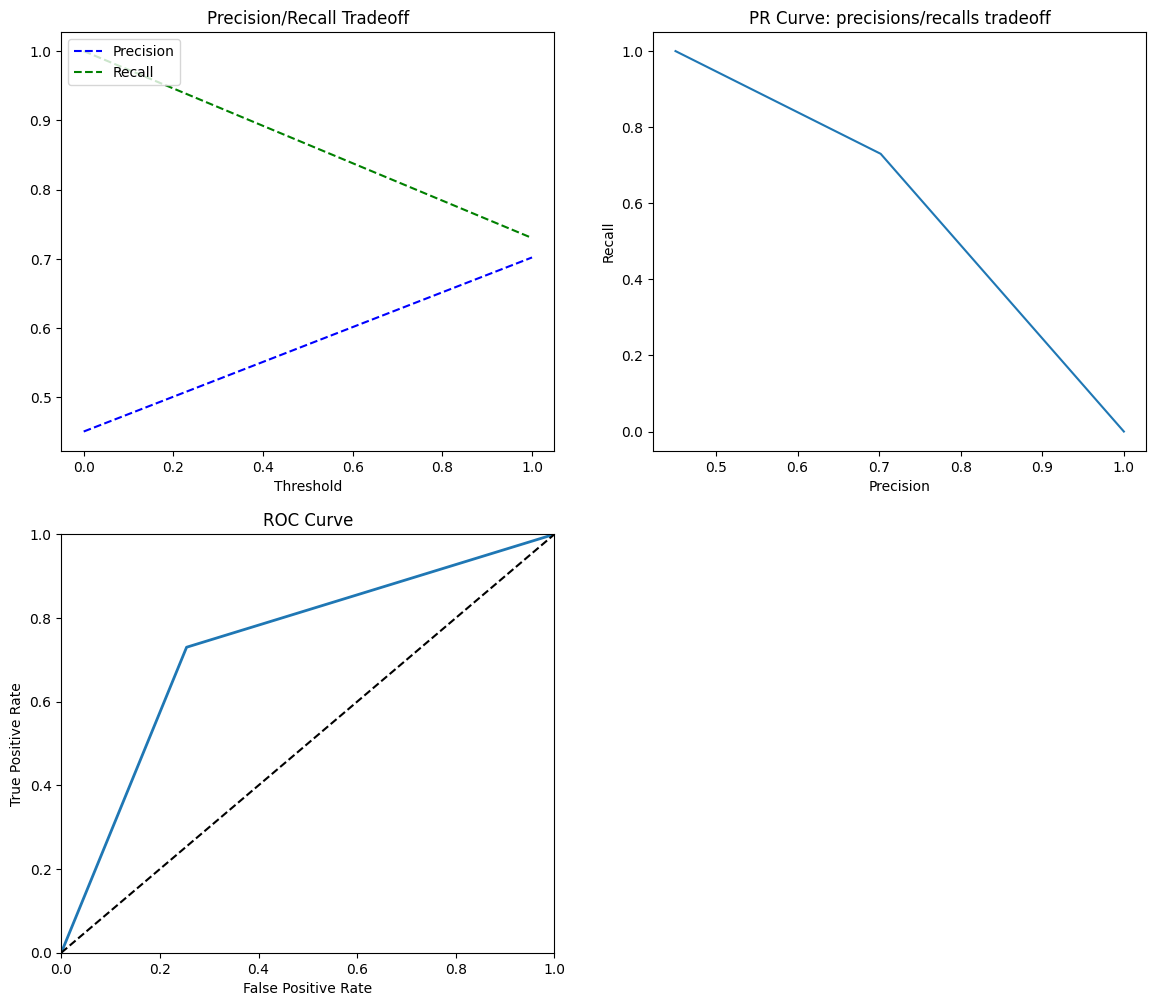

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [ ]:
scores_dict['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

XGBoost

In [ ]:
n_estimators = [50, 100, 250]
max_depth = [2, 3, 5, 10, 15]
# booster = ['gbtree', 'gblinear']
base_score = [0.2, 0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.5, 0.9, 1]
min_child_weight = [1, 2, 3, 4]
subsample = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bytree = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bynode = [0.5, 0.75, 0.85, 0.9, 1]
colsample_bylevel = [0.5, 0.75, 0.85, 0.9, 1]

params_grid = {
    'n_estimators': n_estimators, 
    'max_depth': max_depth,
    'learning_rate' : learning_rate, 
    'min_child_weight' : min_child_weight, 
#     'booster' : booster, 
    'base_score' : base_score,
    'subsample': subsample,
#     'colsample_bytree': colsample_bytree,
#     'colsample_bynode': colsample_bynode,
#     'colsample_bylevel': colsample_bylevel,
}

xgb_clf = xgb.XGBClassifier()

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=5, scoring = 'f1',n_jobs =-1, verbose=1)


xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = xgb.XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
Best paramters: {'base_score': 0.75, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.75}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[214  65]
 [ 39 200]]
ACCURACY SCORE:
0.7992
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.85   0.75      0.80       0.80          0.80
recall      0.77   0.84      0.80       0.80          0.80
f1-score    0.80   0.79      0.80       0.80          0.80
support   279.00 239.00      0.80     518.00        518.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[84 38]
 [23 77]]
ACCURACY SCORE:
0.7252
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.67      0.73       0.73          0.73
recall      0.69   0.77      0.73       0.73          0.73
f1-score    0.73   0.72      0.73       0.72          0.73
support   122.00 100.00      0.73     222.00        222.00


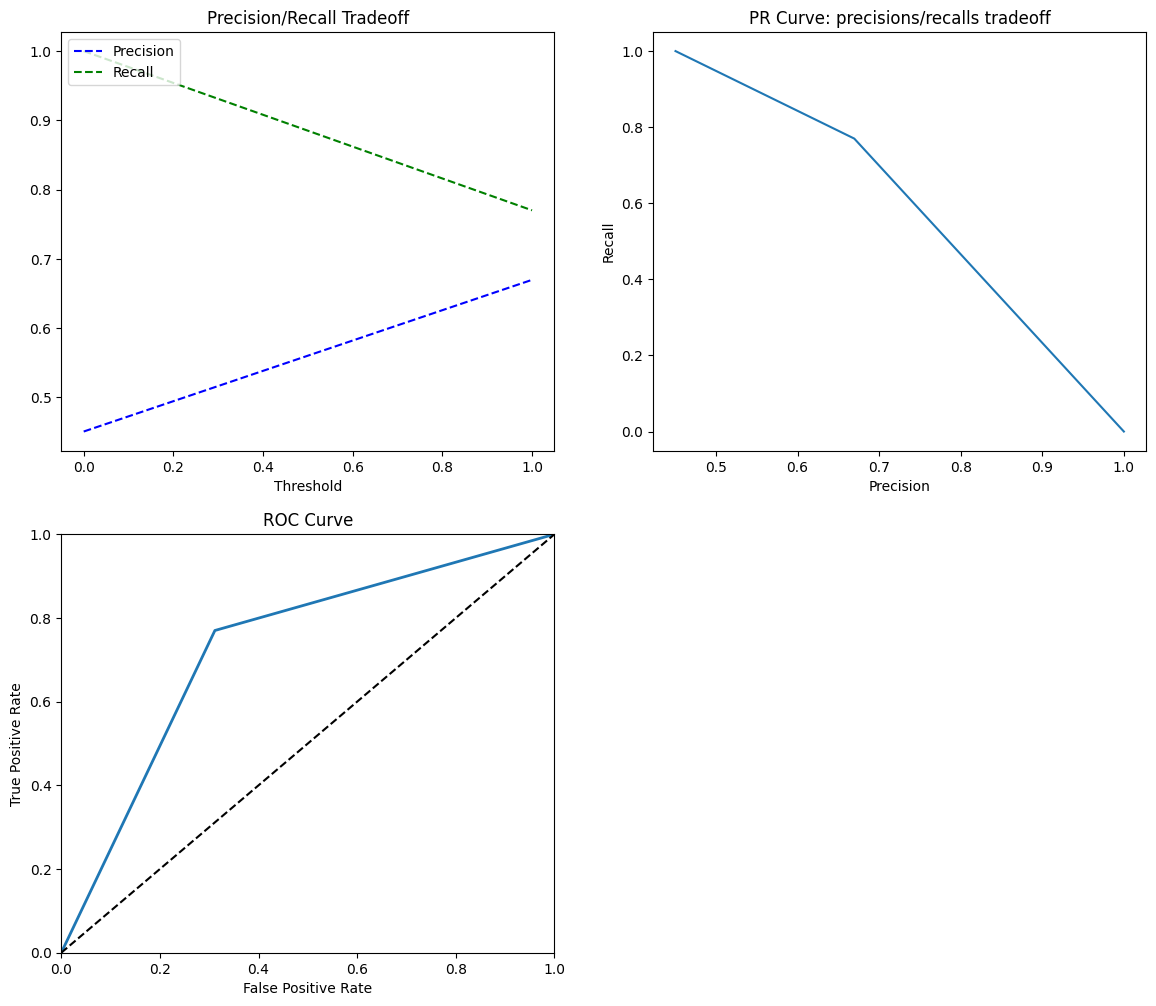

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [ ]:
scores_dict['XGBoost'] = {
        'Train': accuracy_score(y_train, xgb_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xgb_clf.predict(X_test)),
    }

Comparing Machine Learning Models

In [ ]:
ml_models = {
    'Logistic Regression': lr_clf, 
    'Random Forest': rf_clf, 
    'XGboost': xgb_clf, 

}
for model in ml_models:
    print(f"{model.upper()} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

LOGISTIC REGRESSION roc_auc_score: 0.725
RANDOM FOREST roc_auc_score: 0.738
XGBOOST roc_auc_score: 0.729


<Axes: >

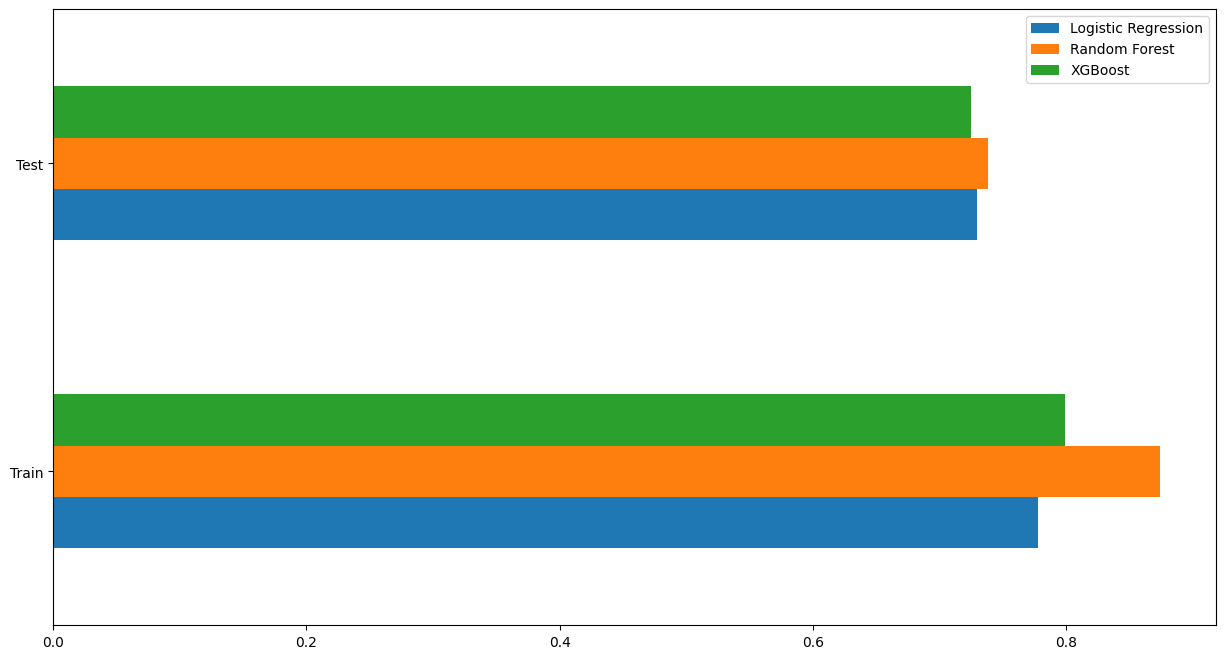

In [ ]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

Save the Models

In [ ]:
with open('Xgb_clf', 'wb') as file:
    pickle.dump(xgb_clf, file)

with open('Rf_clf', 'wb') as file:
    pickle.dump(rf_clf, file)

with open('Lr_clf', 'wb') as file:
    pickle.dump(lr_clf, file)

    # Upload the file to Google Drive

file_name = 'my_output_file.pickle'
folder_id = '/content/drive/MyDrive/bigData/'

file_id = file['id']
media = MediaFileUpload(file_name, mimetype='application/octet-stream')
file = service.files().update(fileId=file_id, media_body=media).execute()